In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore")

In [3]:
wine = pd.read_csv("/Users/liujingyang/Desktop/strongdrink.txt")

In [6]:
wine.head()

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
a.

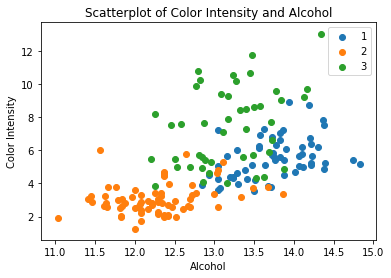

In [7]:
fig, ax = plt.subplots()

for i in [1,2,3]:
    data=wine[wine["cultivar"]==i]
    ax.scatter(data.alco, data.color_int,label=i)

ax.legend()
plt.xlabel("Alcohol")
plt.ylabel("Color Intensity")
plt.title("Scatterplot of Color Intensity and Alcohol")
plt.show()

In [ ]:
b.

In [10]:
X=wine[["alco","malic","tot_phen","color_int"]]
y=wine["cultivar"]

In [11]:
clf_mlog = LogisticRegression(solver='newton-cg',multi_class='multinomial').fit(X, y)

In [12]:
param_dist1 = {'penalty': ['l1','l2'],
               'C': sp_uniform(0.1, 10.0)}
random_search1 = RandomizedSearchCV(LogisticRegression().fit(X, y), 
                                    param_distributions=param_dist1,
                                    n_iter=200, n_jobs=-1, cv=5, random_state=25,
                                     scoring='neg_mean_squared_error')
random_search1.fit(X,y)
print('RandBestEstimator1=', random_search1.best_estimator_)
print('RandBestParams1=', random_search1.best_params_)
print('MSE=', -random_search1.best_score_)

RandBestEstimator1= LogisticRegression(C=2.665871587495725, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)
RandBestParams1= {'C': 2.665871587495725, 'penalty': 'l1'}
MSE= 0.11931818181818182


In [ ]:
c.

In [18]:
rfc = RandomForestRegressor(bootstrap=True,oob_score=True, random_state=25).fit(X, y)

In [19]:
param_dist2 = {'n_estimators':[10,200],
                'max_depth': [2,4],
                'min_samples_split': sp_randint(2, 20),
                'min_samples_leaf': sp_randint(2, 20),
                'max_features': sp_randint(1, 4)}


random_search2 = RandomizedSearchCV(rfc, param_distributions=param_dist2,
                       n_iter=200, n_jobs=-1, cv=5, random_state=25,
                       scoring='neg_mean_squared_error')

random_search2.fit(X,y)
print('RandBestEstimator2=', random_search2.best_estimator_)
print('RandBestParams2=', random_search2.best_params_)
print('MSE =', -random_search2.best_score_)

RandBestEstimator2= RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=2,
           min_samples_split=3, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=None, oob_score=True, random_state=25,
           verbose=0, warm_start=False)
RandBestParams2= {'max_depth': 4, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 200}
MSE = 0.2084170237943434


In [ ]:
d.

In [20]:
svc= SVC(kernel="rbf", degree=2).fit(X, y)

In [21]:
param_dist3 = {'C':sp_uniform(loc=0.1,scale=10.0),
               'gamma':["scale","auto"],
               'shrinking':[True,False]}

random_search3 = RandomizedSearchCV(svc, param_distributions=param_dist3,
                       n_iter=200, n_jobs=-1, cv=5, random_state=25,
                       scoring='neg_mean_squared_error')

random_search3.fit(X,y)
print('RandBestEstimator2=', random_search3.best_estimator_)
print('RandBestParams2=', random_search3.best_params_)
print('MSE =', -random_search3.best_score_)

RandBestEstimator2= SVC(C=3.3605112613782553, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
RandBestParams2= {'C': 3.3605112613782553, 'gamma': 'scale', 'shrinking': True}
MSE = 0.14772727272727273


In [ ]:
e.

In [22]:
mlp= MLPClassifier(activation='tanh', solver='lbfgs', alpha=0.1).fit(X, y)

In [23]:
param_dist4 = {'hidden_layer_sizes':sp_randint(1, 100),
               'activation':["logistic", "relu"],
               'alpha': sp_uniform(0.1, 10.0)}

random_search4 = RandomizedSearchCV(mlp, param_distributions=param_dist4,
                       n_iter=200, n_jobs=-1, cv=5, random_state=25,
                       scoring='neg_mean_squared_error')

random_search4.fit(X,y)
print('RandBestEstimator2=', random_search4.best_estimator_)
print('RandBestParams2=', random_search4.best_params_)
print('MSE =', -random_search4.best_score_)

RandBestEstimator2= MLPClassifier(activation='relu', alpha=0.3814739739579308, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=42, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
RandBestParams2= {'activation': 'relu', 'alpha': 0.3814739739579308, 'hidden_layer_sizes': 42}
MSE = 0.09090909090909091


In [ ]:
f.

In [24]:
d = {'Model': ['multinomial logistic','random forest','support vector machines classifier','multiple hidden layer neural network'],
     'MSE': [-random_search1.best_score_, -random_search2.best_score_, -random_search3.best_score_, -random_search4.best_score_]
    }
df = pd.DataFrame(data=d)
df

,Model,MSE
0,multinomial logistic,0.119318
1,random forest,0.208417
2,support vector machines classifier,0.147727
3,multiple hidden layer neural network,0.090909


Multiple hidden layer neural network model is the best predictor of cultivar as it has the lowest cross-validation MSE.